<a href="https://colab.research.google.com/github/W0rL0rD/image-classifier/blob/main/image-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

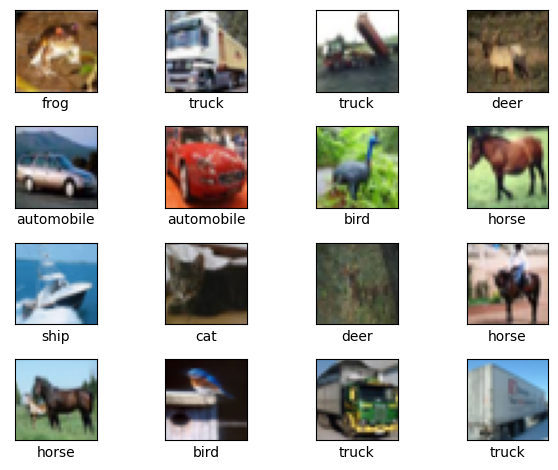

Epoch 1/10
625/625 [==============================] - 21s 31ms/step - loss: 1.7551 - accuracy: 0.3507 - val_loss: 1.5154 - val_accuracy: 0.4305
Epoch 2/10
625/625 [==============================] - 19s 31ms/step - loss: 1.4011 - accuracy: 0.4922 - val_loss: 1.2957 - val_accuracy: 0.5232
Epoch 3/10
625/625 [==============================] - 20s 31ms/step - loss: 1.2379 - accuracy: 0.5581 - val_loss: 1.1725 - val_accuracy: 0.5745
Epoch 4/10
625/625 [==============================] - 19s 31ms/step - loss: 1.1295 - accuracy: 0.5973 - val_loss: 1.2576 - val_accuracy: 0.5663
Epoch 5/10
625/625 [==============================] - 19s 31ms/step - loss: 1.0433 - accuracy: 0.6343 - val_loss: 1.0650 - val_accuracy: 0.6215
Epoch 6/10
625/625 [==============================] - 19s 31ms/step - loss: 0.9620 - accuracy: 0.6587 - val_loss: 1.0696 - val_accuracy: 0.6180
Epoch 7/10
625/625 [==============================] - 19s 30ms/step - loss: 0.8931 - accuracy: 0.6863 - val_loss: 1.0237 - val_accuracy:

INFO:tensorflow:Assets written to: image_classifier.model\assets


INFO:tensorflow:Assets written to: image_classifier.model\assets


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

# Loading the CIFAR-10 dataset in the format:
# (trainx, trainy), (testx, testy) = datasets.cifar10.load_data()
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

# Scaling the images present in the dataset from the RGB range of 0 to 255 to the 
# range of 0 to 1.
training_images, testing_images = training_images / 255, testing_images / 255

# Array of the various classes of objects in the dataset.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
               'horse', 'ship', 'truck']

# Overview of the dataset in a 4x4 grid.
for i in range(16):
    plt.subplot(4,4,i+1) # Plots the 16 images in a 4x4 grid.
    plt.xticks([]) # Disables x-coordinates
    plt.yticks([]) # Disables y-coordinates
    plt.imshow(training_images[i], cmap=plt.cm.binary) # Shows the images
    plt.xlabel(class_names[training_labels[i][0]]) # Shows label below each image which is the class name of the particular image corresponding to the number in training_labels.

plt.tight_layout() # For better spacing of the grid
plt.show()

# Picks only the first 20000 training images and labels and first 4000 testing images and labels.
# Purpose of this is to save time and resources.
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

# Initializing a sequential model
model = models.Sequential()

# First convolutional layer with 32 neurons, a 3x3 filter and the input has a 32x32 pixel image with 3 colour channels.
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))

# First pooling layer which First pooling layer with a 2x2 filter.
# Purpose is to narrow down the patches of the feature map obtained from the first layer.
model.add(layers.MaxPooling2D((2,2)))

# Second convolutional layer with 64 neurons.
model.add(layers.Conv2D(64,(3,3), activation='relu'))

# Second pooling layer
model.add(layers.MaxPooling2D((2,2)))

# Third convolutional layer with 64 neurons.
model.add(layers.Conv2D(64,(3,3), activation='relu'))

# Flattens the grid into a single layer.
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

# Scales the result in the final output layer.
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

model.save('image_classifier.model')

1/1 [==============================] - 0s 167ms/step
Prediction is deer


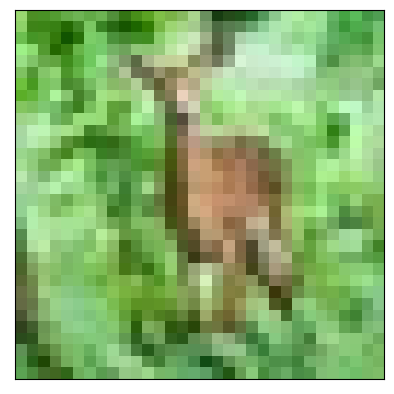

In [ ]:
model = models.load_model('./Image-Classifier/image_classifier.model')

# Reads in the image provided.
img = cv.imread('./Image-Classifier/deer_1.jpg')

# Converts the read image from BGR to RGB format as the trained model works on RGB format.
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Displays the loaded image.
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])

# Passing the image into a numpy array and scale it.
prediction = model.predict(np.array([img]) / 255)

# Gives us the index of the maximum value as that is the most likely prediction by our model.
index = np.argmax(prediction)

# Prints the name of the object corresponding to the given index.
print(f'Prediction is {class_names[index]}')

1/1 [==============================] - 0s 165ms/step
Prediction is deer


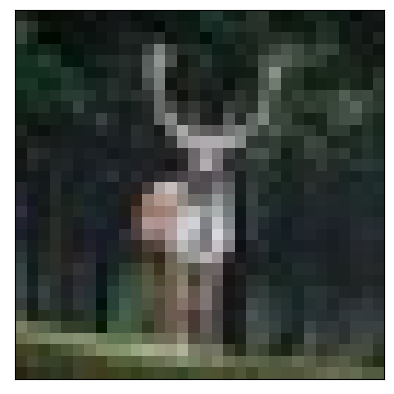

In [ ]:
model = models.load_model('./Image-Classifier/image_classifier.model')

# Reads in the image provided.
img = cv.imread('./Image-Classifier/deer_2.jpg')

# Converts the read image from BGR to RGB format as the trained model works on RGB format.
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Displays the loaded image.
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])

# Passing the image into a numpy array and scale it.
prediction = model.predict(np.array([img]) / 255)

# Gives us the index of the maximum value as that is the most likely prediction by our model.
index = np.argmax(prediction)

# Prints the name of the object corresponding to the given index.
print(f'Prediction is {class_names[index]}')

1/1 [==============================] - 0s 152ms/step
Prediction is automobile


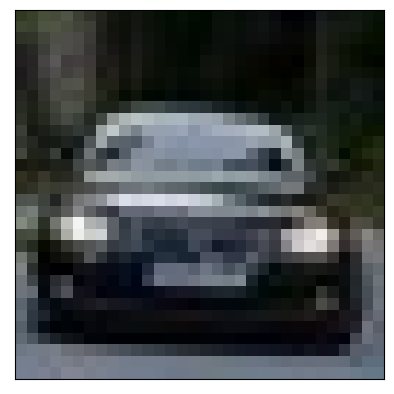

In [ ]:
model = models.load_model('./Image-Classifier/image_classifier.model')

# Reads in the image provided.
img = cv.imread('./Image-Classifier/car.jpg')

# Converts the read image from BGR to RGB format as the trained model works on RGB format.
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Displays the loaded image.
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])

# Passing the image into a numpy array and scale it.
prediction = model.predict(np.array([img]) / 255)

# Gives us the index of the maximum value as that is the most likely prediction by our model.
index = np.argmax(prediction)

# Prints the name of the object corresponding to the given index.
print(f'Prediction is {class_names[index]}')